In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from sklearn.datasets import make_friedman2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class MLayerNN(nn.Module):
    def __init__(self, in_dim, out_dim, depth, N_params):
        super(MLayerNN, self).__init__()
        self.test_loss = []
        self.train_loss = []
        # Initialize layer sizes list
        layer_dims = [in_dim]  # First layer is input dim
        #h = int(N_params / ((in_dim + out_dim) * (depth)))
        #while (in_dim * h + (depth-3) * h**2 + h * out_dim) > N_params:
        #    h -= 1
        h = 2048
        layer_dims += [int(h)] * (depth - 2)  # Set all hidden layers to hidden_dim
        layer_dims.append(out_dim)  # Last layer is output dim
        print(layer_dims)
        self.layers = nn.ModuleList([
            nn.Linear(layer_dims[i-1], layer_dims[i]) for i in range(1,depth)
        ])
        self.params = sum(p.numel() for p in self.parameters() if p.ndimension() > 1)
        self.activation = nn.ReLU()
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))  # Apply ReLU activation
        return self.layers[-1](x)  # Final layer without activation

In [ ]:
from sklearn.preprocessing import StandardScaler
def get_loader(in_dim, noise, n_samples=20000):
    # Set the seed for reproducibility
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Generate the Friedman dataset
    X_train, y_train = make_friedman2(n_samples=int(n_samples * 0.8), random_state=seed, noise=noise)
    X_test, y_test = make_friedman2(n_samples=int(n_samples * 0.2), random_state=seed, noise=0.0)

    # Reshape targets to match expected input dimensions
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # Apply feature scaling (Standardization) ONLY to `X`
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)  # Fit and transform training data
    X_test = scaler_X.transform(X_test)        # Transform test data (using train stats)

    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Keep `y` unchanged
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)    # Keep `y` unchanged

    # Create TensorDataset for train and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Set batch size and create DataLoader for training and testing
    batch_size = 2048
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    return train_loader, test_loader

In [4]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

[4, 512, 512, 1]
Epoch [1/1000], Loss: 362182.949219, test: 346372.327897, lr: 0.001000
Epoch [2/1000], Loss: 328100.591797, test: 295758.174275, lr: 0.001000
Epoch [3/1000], Loss: 260993.456055, test: 213371.585251, lr: 0.001000
Epoch [4/1000], Loss: 171292.976562, test: 123261.596319, lr: 0.001000
Epoch [5/1000], Loss: 93586.141602, test: 66829.258293, lr: 0.001000
Epoch [6/1000], Loss: 53849.430420, test: 42178.003038, lr: 0.001000
Epoch [7/1000], Loss: 34234.815674, test: 27039.127034, lr: 0.001000
Epoch [8/1000], Loss: 22534.900635, test: 18542.800016, lr: 0.001000
Epoch [9/1000], Loss: 16140.619202, test: 14061.936431, lr: 0.001000
Epoch [10/1000], Loss: 12742.327698, test: 11664.559199, lr: 0.001000
Epoch [11/1000], Loss: 10893.436829, test: 10290.101285, lr: 0.001000
Epoch [12/1000], Loss: 9787.575073, test: 9350.168046, lr: 0.001000
Epoch [13/1000], Loss: 8925.379211, test: 8572.124933, lr: 0.001000
Epoch [14/1000], Loss: 8182.895813, test: 7857.997575, lr: 0.001000
Epoch [15/

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 5.059512, test: 1.697495, lr: 0.000100


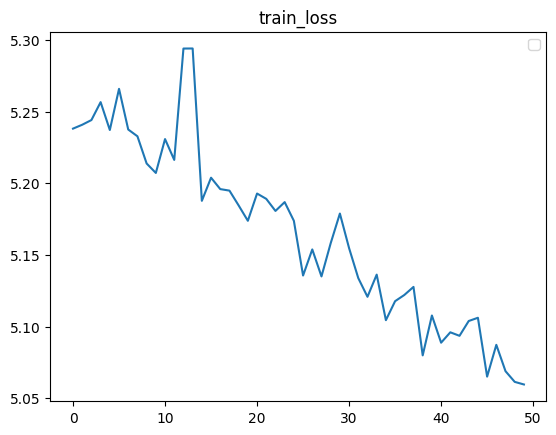

Training Complete!
[4, 512, 512, 1]
Epoch [1/1000], Loss: 362216.816406, test: 346372.153413, lr: 0.001000
Epoch [2/1000], Loss: 328140.697266, test: 295758.055164, lr: 0.001000
Epoch [3/1000], Loss: 261023.000977, test: 213371.391129, lr: 0.001000
Epoch [4/1000], Loss: 171314.901855, test: 123264.089074, lr: 0.001000
Epoch [5/1000], Loss: 93604.847656, test: 66833.432869, lr: 0.001000
Epoch [6/1000], Loss: 53868.364502, test: 42183.897221, lr: 0.001000
Epoch [7/1000], Loss: 34250.954468, test: 27043.673182, lr: 0.001000
Epoch [8/1000], Loss: 22553.006226, test: 18546.881606, lr: 0.001000
Epoch [9/1000], Loss: 16159.357239, test: 14064.306560, lr: 0.001000
Epoch [10/1000], Loss: 12760.392639, test: 11666.468588, lr: 0.001000
Epoch [11/1000], Loss: 10911.767212, test: 10291.326437, lr: 0.001000
Epoch [12/1000], Loss: 9805.929016, test: 9351.071121, lr: 0.001000
Epoch [13/1000], Loss: 8943.585388, test: 8572.775021, lr: 0.001000
Epoch [14/1000], Loss: 8201.796265, test: 7858.543829, lr: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 23.392282, test: 2.893588, lr: 0.001000


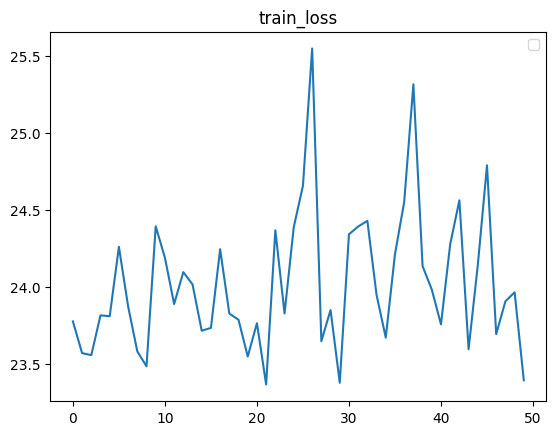

Training Complete!


In [ ]:
import time
import dill
n_samples = 20000
in_dims = [4]
noises = [2,5]
train_losses = []
test_losses = []
adjust = True
for j,in_dim in enumerate(in_dims):
    for noise in noises:
        param = 1
        train_loader, test_loader = get_loader(in_dim, noise,n_samples)
        model = MLayerNN(in_dim, 1, depth = 4 , N_params = param)
        epochs = 2000
        model.train()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            running_loss = 0.0 
            for batch, target in train_loader:
                start_time = time.time()
                optimizer.zero_grad()
                outputs = model(batch)
                loss = criterion(target, outputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            avg_loss = running_loss / len(train_loader)
            model.train_loss.append(avg_loss)
            test_l = compute_test_loss(test_loader, model)
            if (test_l < 4600) and (adjust):
                adjust = False
                for param_group in optimizer.param_groups:
                    param_group['lr'] *= 0.1
            model.test_loss.append(test_l)
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
        plt.plot(model.train_loss[-50:])
        plt.title(f'train_loss')
        plt.legend()
        plt.show()
        print("Training Complete!")
        #with open(f"models/NN_2048{noise}_{in_dim}.dill", "wb") as f:
        #    dill.dump(model, f)